# 探索数据集项目 —《泰坦尼克号》数据探索

## 1.项目研究背景

__资料来源__：本项目的数据集来源于Kaggle网站，名为"Titanic_data.csv"的原始数据文件包含了泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息；


__研究目标__：通过数据分析，探索影响泰坦尼克号上乘客存活率的影响因素有哪些；


__原始数据列名注释__：
* PassengerID：乘客编号
* Survival：是否存活(0 = 死亡 ,1 = 存活)
* Pclass：舱位等级(1 = 头等，2 = 中等，3 = 末等)
* Sex：性别
* Age：年龄
* SibSp ：同乘的兄弟姐妹/配偶数 
* Parch：同乘的父母/小孩数 
* Ticket：船票号
* Fare：票价
* Cabin：客舱号
* Embarked：登船口岸（C = 瑟堡，Q = 皇后镇，S = 南安普顿）


## 2.提出问题

__提出的问题__：
* 探索船上乘客的性别对存活率的影响


* 探索船上乘客的年龄对存活率的影响


* 探索同乘兄弟姐妹/配偶数对存活率的影响

__因变量__：泰坦尼克号上乘客的存活率

__自变量__：乘客的性别、年龄，以及同乘兄弟姐妹/配偶数

##  3.数据采集与清理

### 3.1数据采集

In [71]:
# 导入可能用到的库文件

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# 读取CSV原始数据文件，并查看记录数目

titanic_data = pd.read_csv('Titanic_data.csv')

len(titanic_data)

891

In [73]:
# 打印前10条记录

titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 3.2数据清理

In [74]:
# 从表中可见数据中有“NaN”值，所以寻找含有“NaN”的列并统计数量

def contain_nan(datas):
    num = 0
    for data in datas:
        if pd.isnull(data):
            num += 1
    return num

In [75]:
titanic_data.apply(contain_nan)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
# 剔除“Age”中包含“NaN”的记录，得到新的数据集专用于探索年龄对存活率的影响

titanic_age_data = titanic_data.dropna(subset = ['Age'])

len(titanic_age_data)

714

In [77]:
titanic_age_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


## 4.数据探索

### 4.1探索船上乘客的性别对存活率的影响

In [78]:
# 将titanic_data数据集按照性别分组，只查看“性别”和“存活率”两栏

sex_survived = titanic_data[['Survived', 'Sex']].groupby(['Sex'])

# 统计分组后总人数，存活人数

total_num = sex_survived.count()

survived_num = sex_survived.sum()

# 计算存活率

survived_rate = survived_num / total_num

# 将总人数，存活人数以及得到存活率合并为数据集输出

sex_survived_df = pd.concat([total_num, survived_num, survived_rate],axis = 1)
sex_survived_df.columns = ['total_num', 'survived_num', 'survived_rate']

sex_survived_df

,total_num,survived_num,survived_rate
Sex,,,
female,314,233,0.742038
male,577,109,0.188908


* __表格中数据显示，船上女性的存活率为74.2%，男性的存活率为18.9%。__

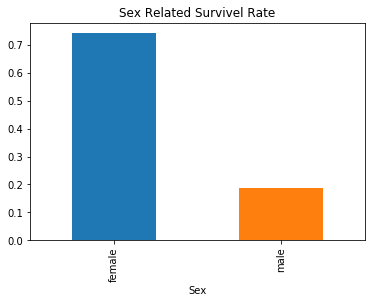

In [79]:
# 绘制性别和存活率之间关系的直方图,其中x轴为性别，y轴为存活率

sex_survived_df['survived_rate'].plot(kind='bar',title='Sex Related Survivel Rate')

### 4.2探索船上乘客的年龄对存活率的影响

In [80]:
# 查看船上乘客的年龄范围

print titanic_age_data['Age'].max()
print titanic_age_data['Age'].min()

80.0
0.42


In [82]:
# 根据年龄范围，对船上乘客的年龄段进行分组,并对不同年龄段命名

age_range = [0, 15, 35, 55, 80]

age_labels = ['children', 'young', 'middleaged', 'aged']

In [83]:
# 在titanic_age_data数据集创建“AgeGroup”列，将数据集中的“Age”列按照年龄段切割并赋值给“AgeGroup”

titanic_age_data['AgeGroup'] = pd.cut(titanic_age_data['Age'], age_range, labels = age_labels)

# 将titanic_age_data数据集的“Survived”和“AgeGroup”合并，合并方向为横向

survived_agegroup = pd.concat([titanic_age_data['Survived'],titanic_age_data['AgeGroup']], axis = 1)

# 将合并后的数据集按照年龄段分组

age_survived = survived_agegroup.groupby(['AgeGroup'])


C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
# 统计分组后总人数，存活人数

total_num = age_survived.count()

survived_num = age_survived.sum()

# 计算存活率

survived_rate = survived_num / total_num

# 将总人数，存活人数以及得到存活率合并为数据集输出

age_survived_df = pd.concat([total_num, survived_num, survived_rate],axis = 1)
age_survived_df.columns = ['total_num', 'survived_num', 'survived_rate']

age_survived_df

,total_num,survived_num,survived_rate
AgeGroup,,,
children,83,49,0.590361
young,414,158,0.381643
middleaged,177,71,0.401130
aged,40,12,0.300000


* __表格中数据显示，儿童存活率为59%，年轻人存活率为38.2%，中年人存活率为40.1%，老年人存活率为30%。__

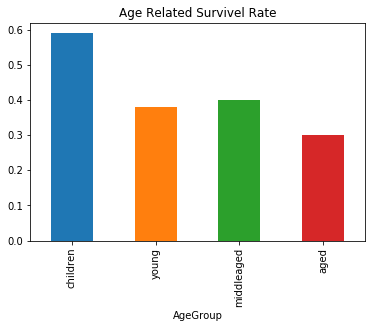

In [86]:
# 绘制年龄和存活率之间关系的直方图,其中x轴为不同年龄段，y轴为存活率

age_survived_df['survived_rate'].plot(kind='bar',title='Age Related Survivel Rate')

###  4.3探索同乘的兄弟姐妹/配偶数对存活率的影响

In [87]:
# 将titanic_data数据集按照同乘兄妹/配偶数分组，只查看“同乘兄妹/配偶数”和“存活率”两栏

sibsp_survived = titanic_data[['Survived', 'SibSp']].groupby(['SibSp'])

# 统计分组后总人数，存活人数

total_num = sibsp_survived.count()

survived_num = sibsp_survived.sum()

# 计算存活率

survived_rate = survived_num / total_num

# 将总人数，存活人数以及得到存活率合并为数据集输出

sibsp_survived_df = pd.concat([total_num, survived_num, survived_rate],axis = 1)
sibsp_survived_df.columns = ['total_num', 'survived_num', 'survived_rate']

sibsp_survived_df

,total_num,survived_num,survived_rate
SibSp,,,
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,16,4,0.250000
4,18,3,0.166667
5,5,0,0.000000
8,7,0,0.000000


* __表格中数据显示，无亲属关系乘客存活率为34.5%，有1个亲属关系的乘客存活率为53.6%，2个的存活率为46.4%，3个的存活率为25%，4个的存活率为16.7%，5个和8个的存活率均为0.0%。__

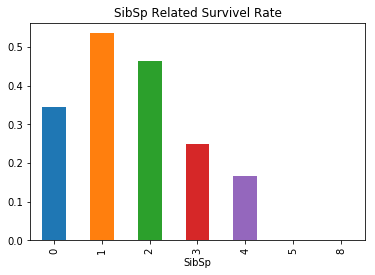

In [88]:
# 绘制同乘兄妹/配偶数和存活率之间关系的直方图,其中x轴为同乘兄妹/配偶数，y轴为存活率

sibsp_survived_df['survived_rate'].plot(kind='bar',title='SibSp Related Survivel Rate')

## 5.数据总结

* 1912年，共有2224名乘客和船员遭遇了泰坦尼克号沉船事故，本项目根据其中的891名人员的基本信息和生还情况，对船上影响乘客存活率的因素进行分析，包括船上人员的性别、年龄分布以及同乘的亲属关系三个方面的因素； 


* 本项目在分析乘客年龄分布和存活率之间的关系时用到了与其他两项不同的数据集，该数据集去除了原数据集年龄数据中的空值，这样处理后得到的数据集共有714条记录，占总样本数的80%；  


* 原始数据集的样本量为891，占总体的40%。进行数据分析时需要考虑样本的选取问题，若样本为随机选取，则本次数据探索的结果可信度较高。

## 6.研究成果交流

__此次对泰坦尼克号数据集进行的数据分析，得出了以下结论：__ 

* 船上女性乘客的存活率远高于男性乘客，同时儿童的存活率也较其他年龄段的乘客高。这两类人群在发生紧急情况时逃生自救能力较弱，存活率本应当较低，但是这里却显示出了相反的结果，猜想是事故发生时对妇女和儿童给予了优先照顾；


* 除儿童外，其余年龄范围内的人群的存活率差别不大。老年人应当也给予了特殊照顾，但是因为老人行动较为缓慢，身体状况较差，因此存活率依然较低，同时老年人的样本数量较少，也可能存在统计不准确的问题；


* 当船上乘客有同乘的兄妹或配偶时，数量为1个人时存活率最高，2个人次之，当有3个人时存活率出现了明显降低，且低于独自一人的存活率。猜想是当存在1~2个亲属时，可以互相帮助、照顾，因此存活率较高，但是人数太多时，难免在逃生时顾虑过多，或被个别人拖累，造成存活率下降。

## 7.参考资料

[1] &nbsp;[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

[2] &nbsp;[Titanic Survival Predictions (Beginner)
](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)

[3] &nbsp;[pyplot — Matplotlib 2.0.2 documentation](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist)

[4] &nbsp;[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

[5] &nbsp;[pandas 0.22.0 documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)